# Communication and Collusion in Oligopoly Market Experiments: A Meta-Study using Machine Learning

# Linear Regression

## Packages

In [1]:
InstallPackages = False
if InstallPackages:
    !pip install pandas
    !pip install scipy
    !pip install numpy
    !pip install statsmodels
    !pip install matplotlib
    !pip install seaborn

In [2]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import itertools

In [3]:
sns.set_theme(style="whitegrid")

## Seed

In [4]:
seed = 42

## Read the data

Set the path

In [5]:
path = 'C:/Users/Maximilian Andres/Nextcloud2/Collusion Meta Study/Data Analysis'
#path = '/Users/birteprado/Documents/02 Uni/02 Master/Master Thesis/05 BigData/04 Target Table/02 Target Tables/Target_GrSe.xlsx'

Read the data according to the path

In [6]:
df = pd.read_excel(path+'/Data/Target_GrSe_LSA.xlsx')

Data info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 59 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudyID            399 non-null    int64  
 1   Author             399 non-null    object 
 2   Title              399 non-null    object 
 3   Year               399 non-null    int64  
 4   Journal            399 non-null    object 
 5   SingleGroup        399 non-null    int64  
 6   Session            399 non-null    int64  
 7   Group              399 non-null    int64  
 8   AvgMatchNo         399 non-null    int64  
 9   CoundOneCoopvar1   399 non-null    float64
 10  CoundOneCoopvar2   399 non-null    float64
 11  CoundAllCoopvar1   399 non-null    float64
 12  CoundAllCoopvar2   399 non-null    float64
 13  T                  399 non-null    float64
 14  R                  399 non-null    float64
 15  S                  399 non-null    float64
 16  P_1                399 non

Data overview

In [8]:
df.head()

,StudyID,Author,Title,Year,Journal,SingleGroup,Session,Group,AvgMatchNo,CoundOneCoopvar1,...,Latent_concept_1,Latent_concept_2,Latent_concept_3,Latent_concept_4,Latent_concept_5,Latent_concept_6,Latent_concept_7,Latent_concept_8,Latent_concept_9,Latent_concept_99
0,201,Bodnar et al.,The Effects of Private Damage Claims on Cartel...,2023,"The Journal of Law, Economics, and Organization",201001001001,1,1,1,0.074074,...,0.068506,0.163280,-0.131301,-0.049012,0.043471,-0.240984,-0.003832,-0.171626,-0.116513,0
1,201,Bodnar et al.,The Effects of Private Damage Claims on Cartel...,2023,"The Journal of Law, Economics, and Organization",201001002001,1,2,1,0.666667,...,0.281998,0.460442,-0.159409,0.152089,0.074870,-0.012658,-0.022104,0.084673,0.013764,0
2,201,Bodnar et al.,The Effects of Private Damage Claims on Cartel...,2023,"The Journal of Law, Economics, and Organization",201001003001,1,3,1,0.583333,...,0.083111,0.158600,-0.094230,0.044542,0.011657,0.048057,-0.137870,0.057924,-0.105778,0
3,201,Bodnar et al.,The Effects of Private Damage Claims on Cartel...,2023,"The Journal of Law, Economics, and Organization",201001004001,1,4,1,1.000000,...,0.159530,0.052399,-0.108923,0.075682,0.012586,-0.055408,-0.099410,-0.089749,-0.100750,0
4,201,Bodnar et al.,The Effects of Private Damage Claims on Cartel...,2023,"The Journal of Law, Economics, and Organization",201001005001,1,5,1,1.000000,...,0.028520,0.195005,-0.066866,0.000730,0.125509,-0.012658,-0.162859,0.111195,-0.018018,0


## Research Question 2: Which communication content leads to more collusion?

To answer this question, we build on a linear regression.

In [9]:
#define expected horizon
df['ExpectedCound'] = df['ExpectedLength']
df.loc[df['StudyID']== 210,'ExpectedCound'] =  df['ExpectedLength'] - 10
df.loc[df['StudyID']== 214,'ExpectedCound'] =  df['ExpectedLength'] - 1

In [10]:
#define l
df['l_1'] = df['l_1']*(-1)

In [11]:
df['g_1'].unique()

array([2.55555556, 9.57807118, 2.56044803, 2.12492177, 3.04158956,
       3.98989899, 1.98989899, 0.11076818, 3.16666667, 2.775     ])

In [12]:
df['l_1'].unique()

array([0.11111111, 1.41879679, 1.83393796, 1.24995372, 0.99956806,
       0.01010101, 0.75308642, 1.18518519, 0.38888889, 1.        ])

In [37]:
specification = 'CoundAllCoopvar1 ~ Latent_concept_0 + Latent_concept_1 + Latent_concept_2 + Latent_concept_99 + ExpectedCound + Fine + g_1 +l_1'

mod = smf.ols(specification, data=df[df['AvgMatchNo'] == 1 ])
res1 = mod.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:       CoundAllCoopvar1   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     41.80
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           4.61e-48
Time:                        20:12:08   Log-Likelihood:                -12.781
No. Observations:                 399   AIC:                             43.56
Df Residuals:                     390   BIC:                             79.46
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.7569      0.07

In [38]:
specification = 'CoundAllCoopvar1 ~ Latent_concept_0 + Latent_concept_1 + Latent_concept_2 + ExpectedCound + Fine + g_1 +l_1'

mod = smf.ols(specification, data=df[(df['AvgMatchNo'] == 1) & (df['Latent_concept_99'] == 0)])
res2 = mod.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:       CoundAllCoopvar1   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     25.48
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           5.88e-28
Time:                        20:12:09   Log-Likelihood:                -16.882
No. Observations:                 349   AIC:                             49.76
Df Residuals:                     341   BIC:                             80.61
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7632      0.074  

In [43]:
from stargazer.stargazer import Stargazer
# get stargazer results table
stargazer_tab_2 = Stargazer([res1, res2])

# change table paramaters/layout
stargazer_tab_2.rename_covariates({'Intercept': 'Constant',
                                 'g_1': 'Gain', 
                                 'l_1': 'Loss',
                                 'Latent_concept_0': "Agreement",
                                 'Latent_concept_1': "Dis-Agreement",
                                 'Latent_concept_2': "Thread",
                                 'Latent_concept_99': "DidNotCommunicate",
                                 'ExpectedCound': "Horizon",
                                 'Fine': "Fine"})

stargazer_tab_2.dependent_variable_name("Collusion Rate")

stargazer_tab_2.covariate_order(['Intercept', 
                               'Latent_concept_0',
                               "Latent_concept_1",
                               "Latent_concept_2",
                               "Latent_concept_99",
                               'ExpectedCound',
                               'Fine',
                               'g_1',
                               'l_1',])

stargazer_tab_2.significant_digits(2)

stargazer_tab_2.custom_columns(['Verson 1', 'Version 2'], [1, 1])

In [47]:
print(stargazer_tab_2.render_latex())

\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lcc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{2}{c}{\textit{Dependent variable: Collusion Rate}} \
\cr \cline{2-3}
\\[-1.8ex] & \multicolumn{1}{c}{Verson 1} & \multicolumn{1}{c}{Version 2}  \\
\\[-1.8ex] & (1) & (2) \\
\hline \\[-1.8ex]
 Constant & 0.76$^{***}$ & 0.76$^{***}$ \\
& (0.07) & (0.07) \\
 Agreement & 0.51$^{***}$ & 0.51$^{***}$ \\
& (0.13) & (0.13) \\
 Dis-Agreement & -0.30$^{***}$ & -0.30$^{***}$ \\
& (0.10) & (0.10) \\
 Thread & 0.22$^{*}$ & 0.19$^{}$ \\
& (0.13) & (0.13) \\
 DidNotCommunicate & -0.22$^{***}$ & \\
& (0.06) & \\
 Horizon & 0.00$^{**}$ & 0.00$^{**}$ \\
& (0.00) & (0.00) \\
 Fine & -0.22$^{***}$ & -0.22$^{***}$ \\
& (0.05) & (0.05) \\
 Gain & -0.00$^{}$ & -0.01$^{}$ \\
& (0.01) & (0.01) \\
 Loss & -0.24$^{***}$ & -0.25$^{***}$ \\
& (0.05) & (0.05) \\
\hline \\[-1.8ex]
 Observations & 399 & 349 \\
 $R^2$ & 0.46 & 0.34 \\
 Adjusted $R^2$ & 0.45 & 0.33 \\
 Residual Std. Error & 0.25 (d

In [45]:
with open(file_path, 'w') as file:
    file.write(stargazer_tab_2.render_latex())
print("File saved successfully.")
    

File saved successfully.


In [15]:
specification = 'CoundAllCoopvar2 ~ Latent_concept_0 + Latent_concept_1 + Latent_concept_2 + Latent_concept_3 + Latent_concept_4 + Latent_concept_99 + ExpectedCound + Fine + g_2 +l_2'

mod = smf.ols(specification, data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       CoundAllCoopvar2   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     17.48
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           2.84e-26
Time:                        19:53:52   Log-Likelihood:                 141.50
No. Observations:                 399   AIC:                            -261.0
Df Residuals:                     388   BIC:                            -217.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.6894      0.04

In [16]:
specification = 'CoundAllCoopvar2 ~ Latent_concept_0 + Latent_concept_1 + Latent_concept_2 + ExpectedCound + Fine + g_2 +l_2'

mod = smf.ols(specification, data=df.loc[df.loc[:,"Latent_concept_99"] == 0])
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       CoundAllCoopvar2   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     19.64
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           4.47e-22
Time:                        19:53:52   Log-Likelihood:                 117.70
No. Observations:                 349   AIC:                            -219.4
Df Residuals:                     341   BIC:                            -188.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6660      0.038  

## Visualize the results

Function for the regression parts

In [17]:
def plot_overview_regression(df, x, y,x_title, y_title):
    
    """
    This function is used to plot the regression results across studies. 
    
    """
    
    #define the marker per study
    marker = itertools.cycle(('o', 'v', 's', 'p', 'D', 'P', 'X', '<'))
    
    # Initialize canvas
    plt.figure(figsize=(8, 6))

    # Iterate over unique AuthorYear groups
    for author_year, group_data in df.groupby('AuthorYear'):
        sns.scatterplot(data=group_data, x=x, y=y, label=author_year, alpha=0.7, marker=next(marker), color='#646464')

    # Overlay a regression line for the entire dataset
    sns.regplot(data=df, x=x, y=y, scatter=False, color='#7998C9')

    # Set labels and title
    plt.xlabel(x_title)
    plt.ylabel(y_title)

    # Display the legend
    plt.legend(title='Study', loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=False, ncol=2)

    # Save
    plt.savefig(path + '/Figures/Figure_Scatterplot_'+x+'_'+y+'.pdf', dpi = 300, bbox_inches='tight')

    # Display
    plt.show()
    
    return plt

Visualize the effect of x on y conditionally z

In [18]:
def plot_condition_regression(df, x, y, hue, x_title, y_title, z_title):
    
    
    """
    This function is used to plot the regression results of x on y condition on z. 
    
    """
    
    #define the palette
    sns.set_palette(('#adadad', '#000000'))
    
    # Initialize canvas
    plt.figure(figsize=(8, 6))

    #draw canvas
    for val in df[hue].unique():
        data_subset = df[df[hue] == val]
        sns.scatterplot(data=data_subset, x=x, y=y, label=f'{hue}: {val}')

    # Set labels and title
    plt.xlabel(x_title)
    plt.ylabel(y_title)

    # Display the legend
    plt.legend(title=hue, loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=False, ncol=2,labels=z_title)
    
    for val in df[hue].unique():
        data_subset = df[df[hue] == val]
        sns.regplot(data=data_subset, x=x, y=y, scatter=False, ci=90)

    # Save
    #plt.savefig(path + '/Figures/Figure_Condition_'+x+'_'+y+'_'+z+'.pdf', dpi = 300, bbox_inches='tight')

    # Display
    plt.show()
    
    return plt


Plot the overview per regression

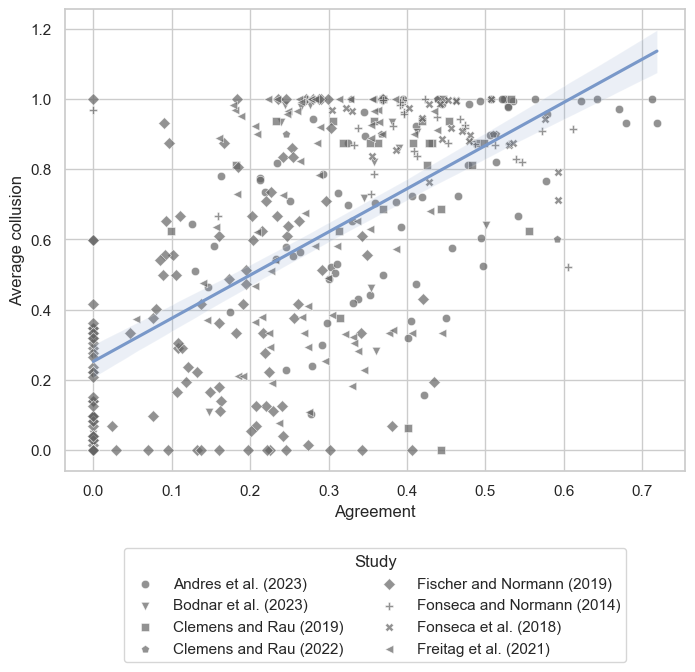

<module 'matplotlib.pyplot' from 'C:\\Users\\Maximilian Andres\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [19]:
plot_overview_regression(df, x = "Latent_concept_0", y= "CoundAllCoopvar1", x_title = 'Agreement', y_title='Average collusion')

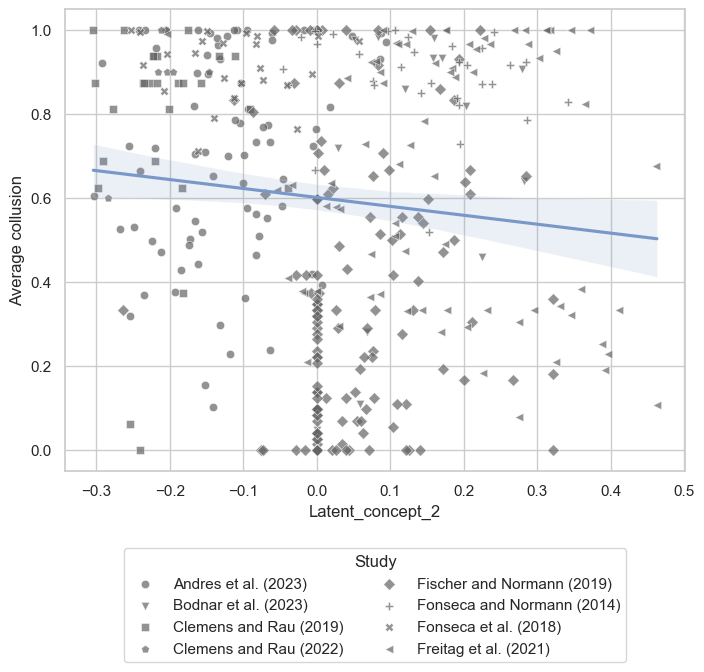

<module 'matplotlib.pyplot' from 'C:\\Users\\Maximilian Andres\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [20]:
plot_overview_regression(df, x = "Latent_concept_1", y= "CoundAllCoopvar1", x_title = 'Latent_concept_2', y_title='Average collusion')

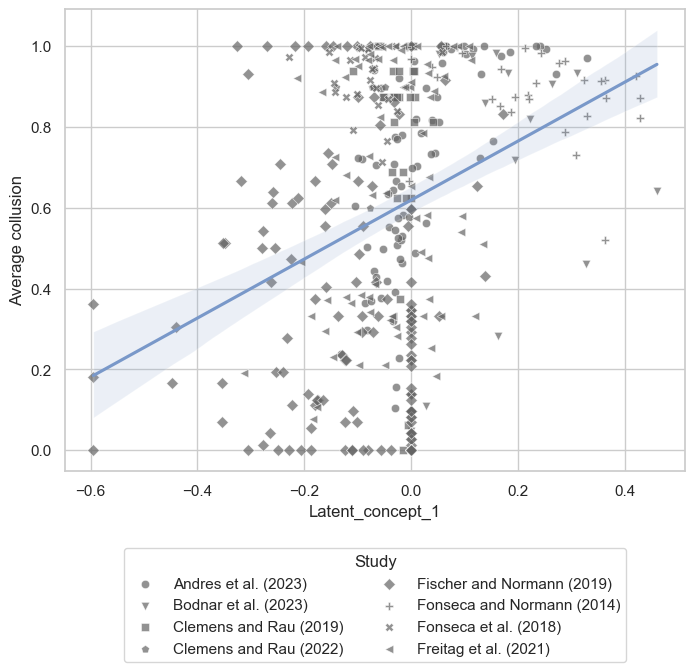

<module 'matplotlib.pyplot' from 'C:\\Users\\Maximilian Andres\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [21]:
plot_overview_regression(df, x = "Latent_concept_2", y= "CoundAllCoopvar1", x_title = 'Latent_concept_1', y_title='Average collusion')

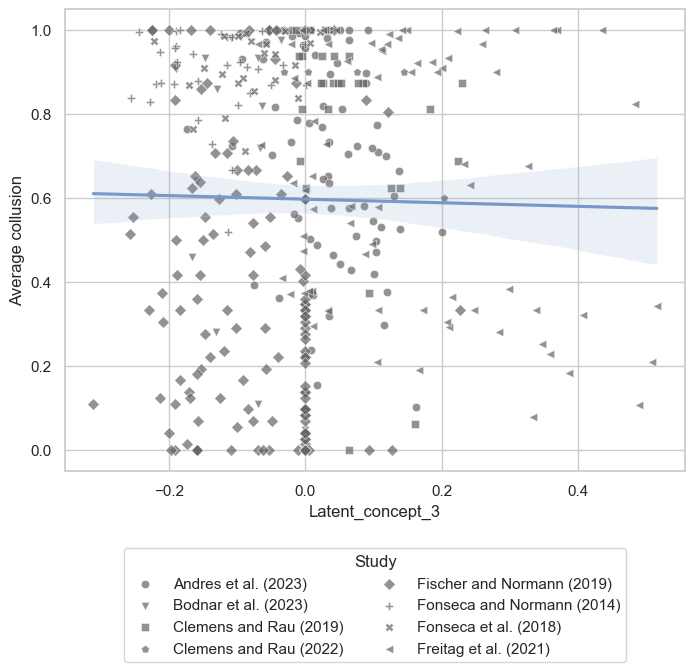

<module 'matplotlib.pyplot' from 'C:\\Users\\Maximilian Andres\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [22]:
plot_overview_regression(df, x = "Latent_concept_3", y= "CoundAllCoopvar1", x_title = 'Latent_concept_3', y_title='Average collusion')

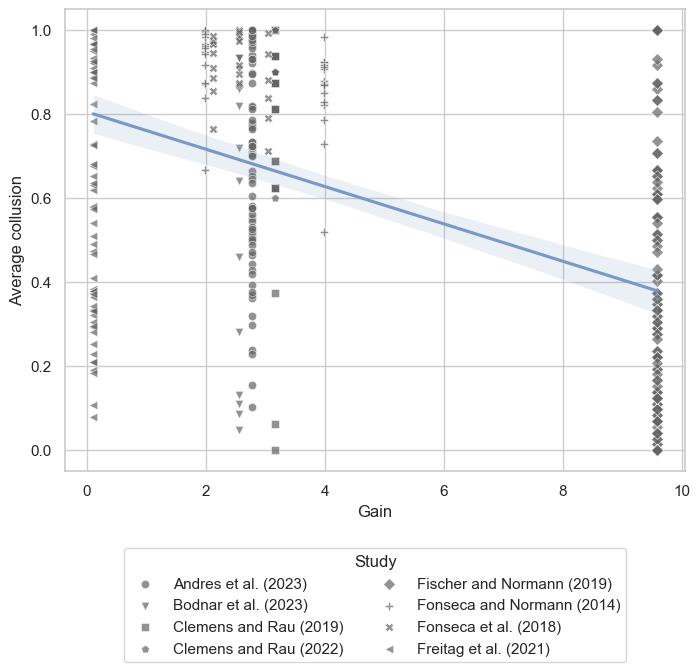

<module 'matplotlib.pyplot' from 'C:\\Users\\Maximilian Andres\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [23]:
plot_overview_regression(df, x = "g_1", y= "CoundAllCoopvar1", x_title = 'Gain', y_title='Average collusion')

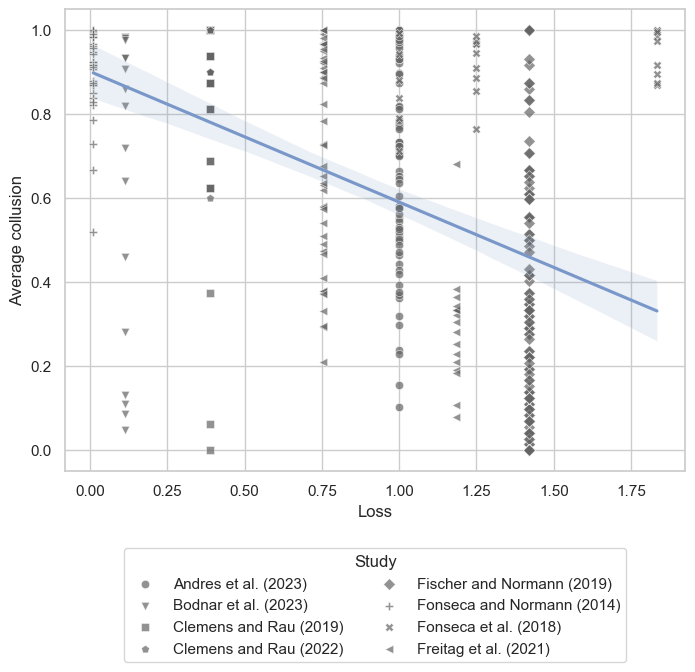

<module 'matplotlib.pyplot' from 'C:\\Users\\Maximilian Andres\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [24]:
plot_overview_regression(df, x = "l_1", y= "CoundAllCoopvar1", x_title = 'Loss', y_title='Average collusion')

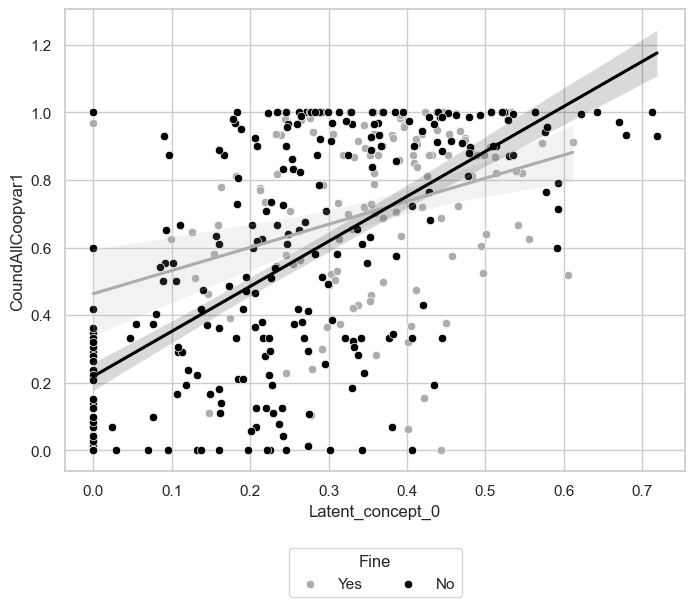

<module 'matplotlib.pyplot' from 'C:\\Users\\Maximilian Andres\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [25]:
plot_condition_regression(df, x = "Latent_concept_0",
                          y= "CoundAllCoopvar1",
                          hue='Fine',
                          x_title = 'Agreement',
                          y_title='Average collusion',
                          z_title = ['Yes','No']
                         )

Regression 2

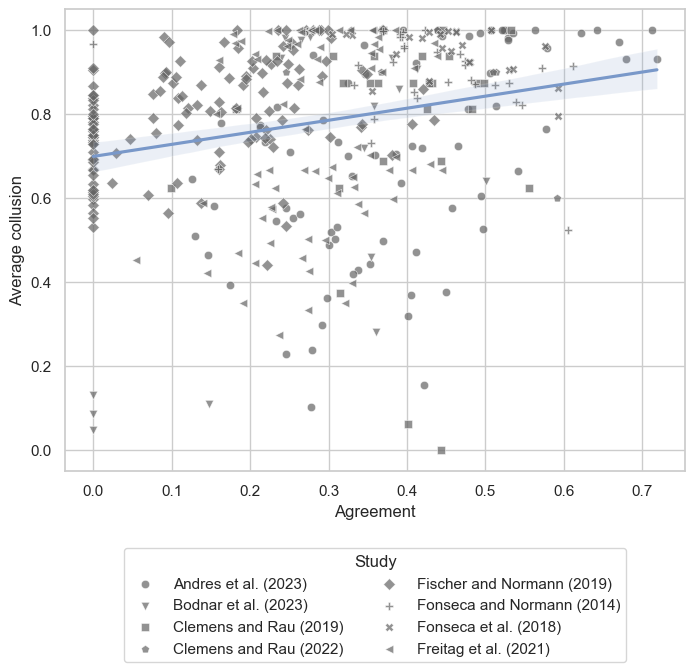

<module 'matplotlib.pyplot' from 'C:\\Users\\Maximilian Andres\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [26]:
plot_overview_regression(df, x = "Latent_concept_0", y= "CoundAllCoopvar2", x_title = 'Agreement', y_title='Average collusion')

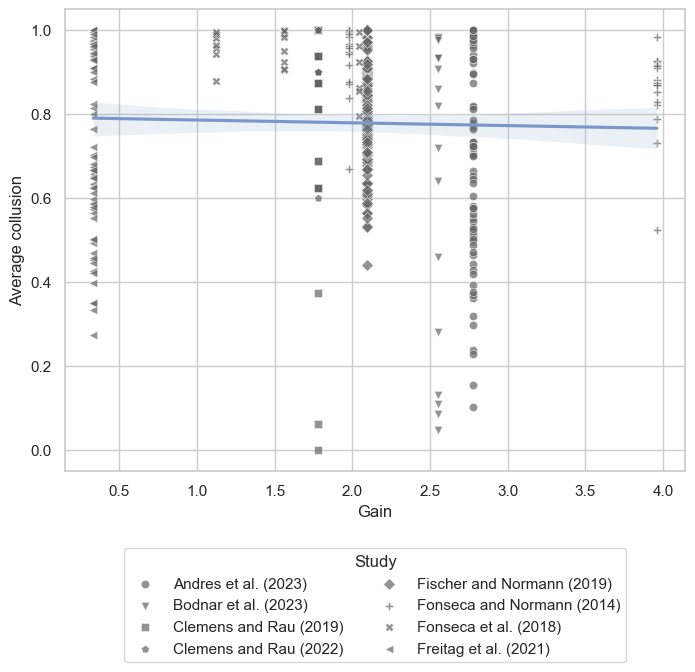

<module 'matplotlib.pyplot' from 'C:\\Users\\Maximilian Andres\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [27]:
plot_overview_regression(df, x = "g_2", y= "CoundAllCoopvar2", x_title = 'Gain', y_title='Average collusion')

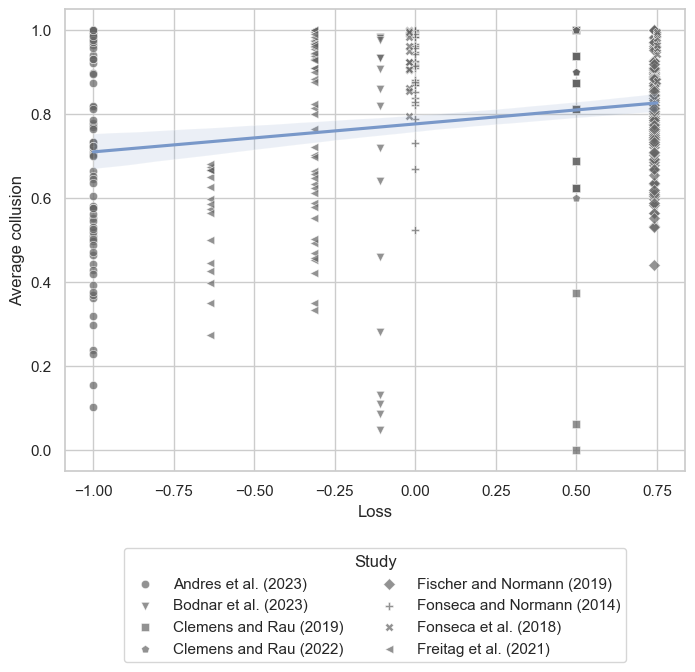

<module 'matplotlib.pyplot' from 'C:\\Users\\Maximilian Andres\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [28]:
plot_overview_regression(df, x = "l_2", y= "CoundAllCoopvar2", x_title = 'Loss', y_title='Average collusion')

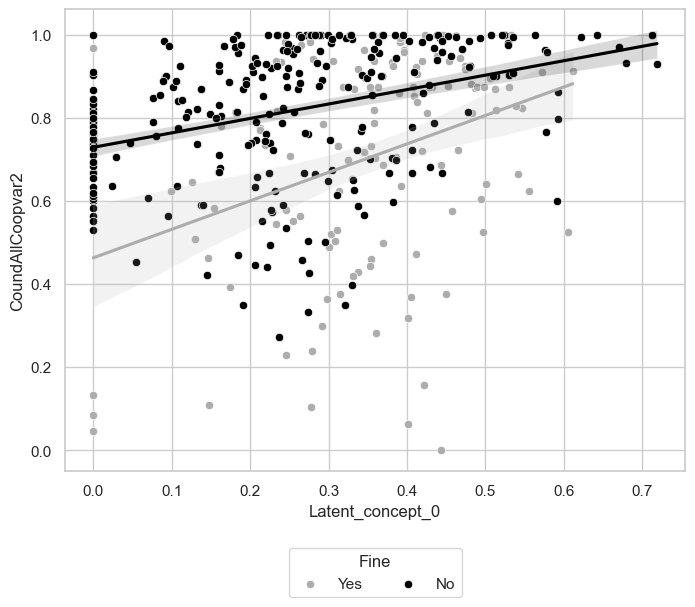

<module 'matplotlib.pyplot' from 'C:\\Users\\Maximilian Andres\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [29]:
plot_condition_regression(df, x = "Latent_concept_0",
                          y= "CoundAllCoopvar2",
                          hue='Fine',
                          x_title = 'Agreement',
                          y_title='Average collusion',
                          z_title = ['Yes','No']
                         )